# Database Setup

Using INEP Microdados for Higher Education Census (access in http://inep.gov.br/web/guest/microdados ), we look to make a few analysis.

Due the datebase size, we will test by sampling. In 12043994 total entries in 2018 dataset, 6712803 are women. Since theres no ordering, we will consider in this analysis a sample of 100k results in the data set.

Considering each database size, around 4GB, you can narrow it down using:

```
# extract header
head -1 input > sample

# macOS shuffler
brew install coreutils 

# dataset sample; macOS use gshuf instead
tail +2 input.csv | shuf | head -100000 >> sample.csv

# filter by column value
cat file_name.CSV | awk -F'|' '{if($16 == "1")print}' > file_output.CSV

# get first 499999 entries and header
head -n500000 file_name.csv

# get only values in column 16
cat file_name.csv | awk -F'|' '{print $16}'

# count lines
wc -l file_name.csv
```

## 2018 data example

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("data/2018.csv",sep="|", dtype='unicode')

In [3]:
df[:10]

,NU_ANO_CENSO,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,CO_CURSO,CO_CURSO_POLO,TP_TURNO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,TP_NIVEL_ACADEMICO,...,TP_MOBILIDADE_ACADEMICA,TP_MOBILIDADE_ACADEMICA_INTERN,CO_IES_DESTINO,CO_PAIS_DESTINO,IN_MATRICULA,IN_CONCLUINTE,IN_INGRESSO_TOTAL,IN_INGRESSO_VAGA_NOVA,IN_INGRESSO_PROCESSO_SELETIVO,NU_ANO_INGRESSO
0,2018,605,3,1,14678,NaN,3,1,1,1,...,NaN,NaN,NaN,NaN,1,1,0,0,NaN,2014
1,2018,1053,4,3,87276,NaN,3,1,1,1,...,NaN,NaN,NaN,NaN,0,0,0,0,NaN,2013
2,2018,14,5,1,116202,NaN,3,3,1,1,...,NaN,NaN,NaN,NaN,1,0,1,0,NaN,2018
3,2018,1113,5,2,73557,NaN,1,1,1,1,...,NaN,NaN,NaN,NaN,1,0,0,0,NaN,2015
4,2018,203,4,1,5498,NaN,1,1,1,1,...,NaN,NaN,NaN,NaN,1,0,0,0,NaN,2017
5,2018,1365,5,2,22075,NaN,3,2,1,1,...,NaN,NaN,NaN,NaN,1,0,1,1,NaN,2018
6,2018,823,5,1,1191638,NaN,2,1,1,1,...,NaN,NaN,NaN,NaN,1,0,0,0,NaN,2017
7,2018,221,4,1,1258533,798868,NaN,3,2,1,...,NaN,NaN,NaN,NaN,0,0,1,1,NaN,2018
8,2018,437,5,1,9037,NaN,3,1,1,1,...,NaN,NaN,NaN,NaN,1,1,1,0,NaN,2018
9,2018,3268,4,3,5000952,NaN,3,1,1,1,...,NaN,NaN,NaN,NaN,1,0,0,0,NaN,2017


### Codes

In [14]:
code = pd.read_csv("data/2018/anexos/ANEXO I/code.csv", sep='|')

code

,NOME DA VARIÁVEL,DESCRIÇÃO DA VARIÁVEL,DESCRIÇÃO DAS CATEGORIAS,OBSERVAÇÃO
0,NaN,NaN,NaN,NaN
1,NU_ANO_CENSO,Ano de referência do Censo Superior,NaN,* Variável criada a partir do ano de referênci...
2,CO_IES,Código único de identificação da IES,NaN,NaN
3,TP_CATEGORIA_ADMINISTRATIVA,Tipo da Categoria Administrativa da IES,1. Pública Federal 2. Pública Estadual 3. Públ...,"* As categorias 6, 8 e 9 somente no ano de 200..."
4,TP_ORGANIZACAO_ACADEMICA,Tipo da Organização Acadêmica da IES,1. Universidade 2. Centro Universitário 3. Fac...,NaN
5,CO_CURSO,Código único de identificação do curso gerado ...,NaN,NaN
6,CO_CURSO_POLO,Código de identificação do polo vinculado ao c...,NaN,NaN
7,TP_TURNO,Tipo do turno do curso ao qual o aluno está vi...,1. Matutino 2. Vespertino 3. Noturno 4. Integr...,* Valor nulo para o ano de 2009
8,TP_GRAU_ACADEMICO,Tipo do grau acadêmico conferido ao diplomado ...,1. Bacharelado 2. Licenciatura 3. Tecnológico ...,* A opção 4 (Bacharelado e licentiatura) apena...
9,TP_MODALIDADE_ENSINO,Tipo da modalidade de ensino do curso,1. Presencial 2. Curso a distância,NaN


### Gender

In [6]:
df.query('TP_SEXO == "1"').TP_SEXO.count()

55693

In [7]:
(df.TP_SEXO == '2').sum()

44307

In [8]:
gender = df['TP_SEXO'].value_counts()
print(gender)

gender.plot(kind='bar', figsize=(20,10))

1    55693
2    44307
Name: TP_SEXO, dtype: int64


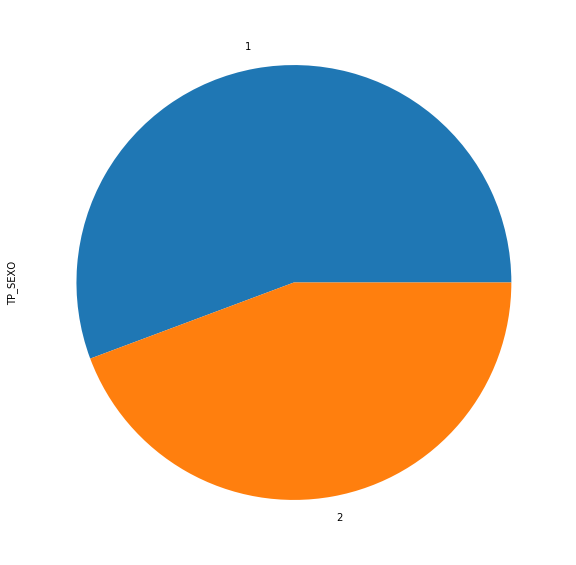

In [26]:
gender.plot(kind='pie', figsize=(20,10))

1. Feminino 2. Masculino 

### Colour

1    40771
3    28244
0    21459
2     6865
4     1626
5      688
9      347
Name: TP_COR_RACA, dtype: int64


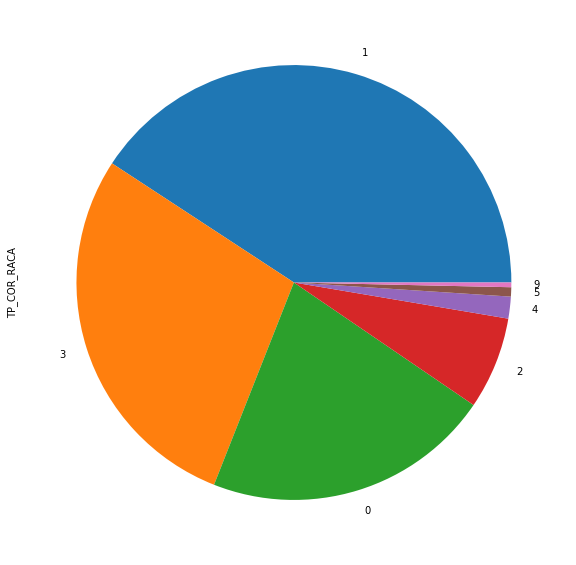

In [25]:
colour = df['TP_COR_RACA'].value_counts()
print(colour)

colour.plot(kind='pie', figsize=(20,10))

0. Aluno não quis declarar cor/raça   1. Branca 2. Preta 3. Parda 4. Amarela 5. Indígena 9. Não dispõe da informação (Não resposta)|

### High School type

1    70036
2    29013
9      951
Name: TP_ESCOLA_CONCLUSAO_ENS_MEDIO, dtype: int64


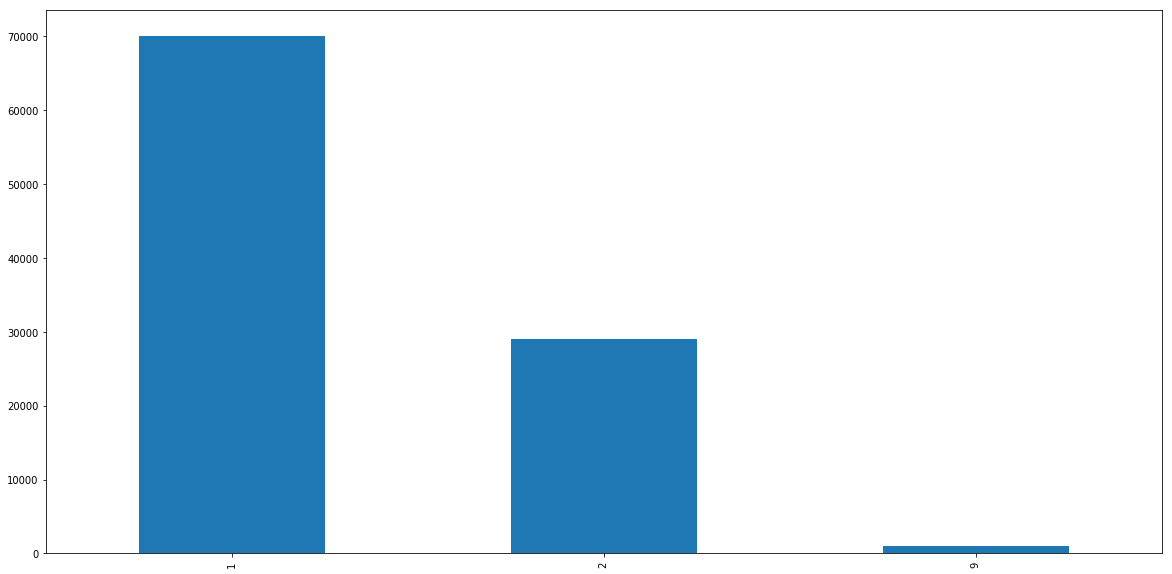

In [11]:
middle_school = df['TP_ESCOLA_CONCLUSAO_ENS_MEDIO'].value_counts()
print(middle_school)

middle_school.plot(kind='bar', figsize=(20,10))

1. Pública 2. Privada 9. Não dispõe da informação 

### Courses

In [49]:
coursedf = pd.read_csv("data/2018_cursos.csv", sep='|')
code_course_sample = coursedf[["CO_CURSO", "NO_CURSO"]]
code_course_sample = code_course_sample.set_index('CO_CURSO')
code_course_sample

,NO_CURSO
CO_CURSO,
1,DIREITO
2,CI�NCIAS ECON�MICAS
3,ENGENHARIA CIVIL
6,PEDAGOGIA
7,SERVI�O SOCIAL
8,CI�NCIAS CONT�BEIS
9,AGRONOMIA
10,ENGENHARIA FLORESTAL
12,MEDICINA


In [231]:
df_fixed_course = df.copy()
#.value_counts()
#course_sample = course[:15]
print(code_course_sample.loc[73557, 'NO_CURSO'])
print(code_course_sample.loc[5498, 'NO_CURSO'])

#print(df_fixed_course['CO_CURSO'].apply(lambda x: int(x)+1))
df_fixed_course['NO_CURSO'] = df_fixed_course['CO_CURSO'].apply(
    lambda x: code_course_sample.loc[int(x), 'NO_CURSO']
)
df_fixed_course

# for val in course_sample:
#     val = code_course_sample['val']
#     print()

#course[:15].plot(kind='bar', figsize=(20,10))

DIREITO
DIREITO


AttributeError: 'DataFrame' object has no attribute 'value_counts'

### Uni Type

4    53519
5    24714
1    13904
2     6823
3      746
7      294
Name: TP_CATEGORIA_ADMINISTRATIVA, dtype: int64


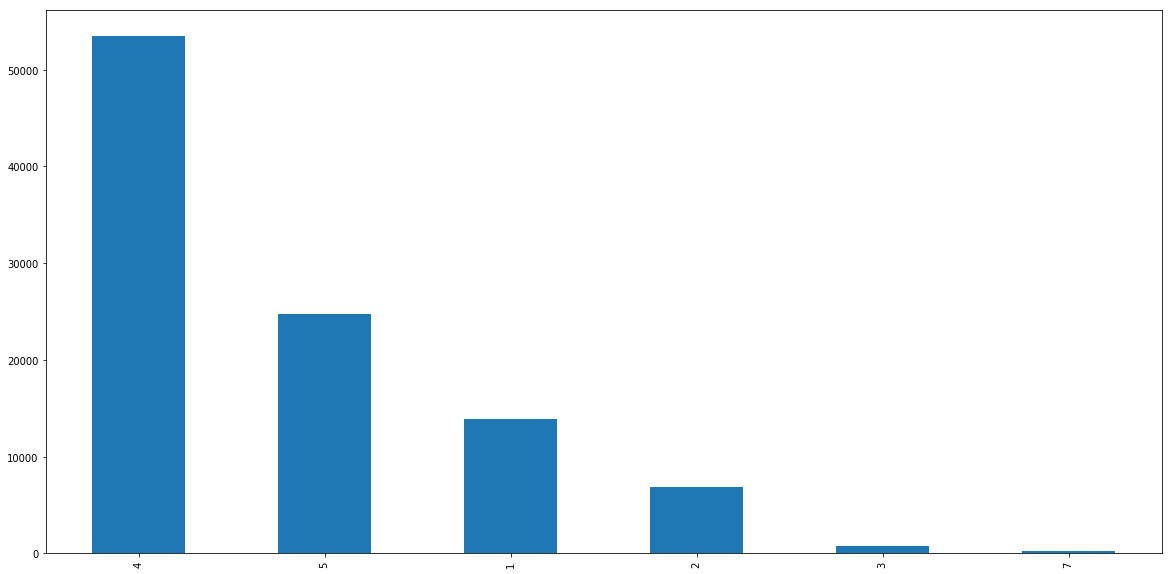

In [13]:
uni_type = df['TP_CATEGORIA_ADMINISTRATIVA'].value_counts()
print(uni_type)

uni_type.plot(kind='bar', figsize=(20,10))

1. Pública Federal 2. Pública Estadual 3. Pública Municipal 4. Privada com fins lucrativos 5. Privada sem fins lucrativos 6. Privada - Particular em sentido estrito 7. Especial 8. Privada comunitária 9. Privada confessional|

## Courses Code

In [27]:
coursedf = pd.read_csv("data/2018_cursos.csv", sep='|')
coursedf[["CO_CURSO", "NO_CURSO"]]

,CO_CURSO,NO_CURSO
0,1,DIREITO
1,2,CI�NCIAS ECON�MICAS
2,3,ENGENHARIA CIVIL
3,6,PEDAGOGIA
4,7,SERVI�O SOCIAL
5,8,CI�NCIAS CONT�BEIS
6,9,AGRONOMIA
7,10,ENGENHARIA FLORESTAL
8,12,MEDICINA
9,13,ADMINISTRA��O


Of the 55693 total women in the database, only 6917 enrolled in a Federal Uni

In [24]:
df.query('TP_SEXO == "1" & TP_CATEGORIA_ADMINISTRATIVA == "1"').TP_SEXO.count()

6917